slope of regression line:  9449.962321455143
intercept of regression line:  25792.20019866825
rmse value:  5592.0436087606595
Accuracy of model : 0.9569566641435086


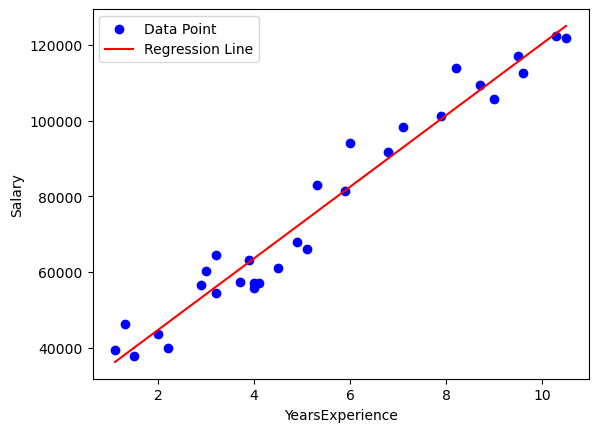

In [2]:
# linear regression using gradient descent

#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# error function

def mean_squared_error(y, y_pred):
    
    return (np.sum((y-y_pred)**2))/(y.shape[0]) 

# partial derivaties w.r.t weight and bias

def dev_wrt_weight(x, y, weight, bias):
    return (-2*(np.sum((y-(weight*x+bias))*x)))/(x.shape[0])

def dev_wrt_bias(x, y, weight, bias):
    return (-2*(np.sum((y-(weight*x+bias)))))/(x.shape[0])


# gradient descent function

def grad_descent(x, y, weight, bias,max_iters,learning_rate):
    
    for epoch in range(max_iters):
        weight -= learning_rate * dev_wrt_weight(x, y, weight, bias)
        bias -= learning_rate * dev_wrt_bias(x, y, weight, bias)
    
    return weight,bias

# create function to compute r2 score

def r2_score(y, y_pred):
    y_mean = np.mean(y)
    
    ss_t = np.sum((y - y_mean)**2)
    ss_r = np.sum((y - y_pred)**2)
    
    return 1 - (ss_r/ss_t)
    
# intialise parameters

weight=0
bias=0
learning_rate=0.01
max_iters=10000

# read data file 

data_frame=pd.read_csv('Salary_Data.csv')

# extract columns of dataframe to numpy arrays 
# tranning data for model

x = data_frame['YearsExperience'].to_numpy()
y = data_frame['Salary'].to_numpy()

weight ,bias = grad_descent(x, y, weight, bias, max_iters, learning_rate)
print("slope of regression line: ",weight)
print("intercept of regression line: ",bias)

# compute predicted values
y_pred = weight * x + bias

# compute root mean squared error
print("rmse value: ",np.sqrt(mean_squared_error(y, y_pred)))

# compute r2 score to check accuracy of model

print("Accuracy of model :", r2_score(y, y_pred))

#plot the data with regression line

plt.scatter(x,y,color='blue',label='Data Point')
plt.plot(x, y_pred,color='red',label='Regression Line')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()